In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/malicious-and-benign-websites/dataset.csv


# Preprocessing data

Import data from csv file and show 5 first lines as an example

In [2]:
data =  pd.read_csv('/kaggle/input/malicious-and-benign-websites/dataset.csv')
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


First of all,  we do some basic statistics to give an overview

In [3]:
data.describe(include='all')

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781,1781.000000,1781.000000,1781,1780,969.000000,1781,1781,1781,1781,...,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
unique,1781,NaN,NaN,9,239,NaN,49,182,891,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B0_936,NaN,NaN,UTF-8,Apache,NaN,US,CA,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,676,386,NaN,1103,372,127,139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.961258,11.111735,NaN,NaN,11726.927761,NaN,NaN,NaN,NaN,...,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,NaN,27.555586,4.549896,NaN,NaN,36391.809051,NaN,NaN,NaN,NaN,...,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,NaN,16.000000,5.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,NaN,39.000000,8.000000,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,49.000000,10.000000,NaN,NaN,1853.000000,NaN,NaN,NaN,NaN,...,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,NaN,68.000000,13.000000,NaN,NaN,11323.000000,NaN,NaN,NaN,NaN,...,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000


From the table, we can see that there are some columns which contain unique values, especially URL that is totally unique.

For example:
* URL (100% unique)
* WHOIS_REGDATE (50% unique) 
* WHOIS_UPDATED_DATE (33% unique) 


Those columns can make noises and decrease the accuracy because the difference between them will increase a distance in our modal without any reason.

Therefore we have to drop those column to make data more clean

In [4]:
data = data.drop(labels=['URL','WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis='columns')

Next, we will check loss data in our data set by printing out all lines that contain any missing value

In [5]:
print(data.isnull().sum())

data[pd.isnull(data).any(axis='columns')]

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
5,18,7,UTF-8,nginx,NaN,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0,0
8,20,5,utf-8,nginx/1.10.1,NaN,None,None,0,0,0,0,2,3,213,146,2,2.0,1
9,20,5,utf-8,nginx/1.10.1,NaN,None,None,0,0,0,0,2,1,62,146,2,2.0,1
10,20,6,utf-8,Apache,NaN,US,Kansas,0,0,0,0,0,0,0,0,0,0.0,0
20,22,6,utf-8,openresty/1.11.2.1,NaN,US,CA,39,29,6,3833,43,42,22495,4125,43,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,178,16,UTF-8,Apache,NaN,ES,Barcelona,0,0,0,0,0,3,186,0,0,0.0,1
1775,194,17,UTF-8,Apache,NaN,ES,Barcelona,0,0,0,0,0,3,186,0,0,0.0,1
1776,194,16,UTF-8,Apache,NaN,ES,Barcelona,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,UTF-8,Apache,NaN,ES,Barcelona,0,0,0,0,0,2,124,0,0,0.0,1


For missing values, there are 2 ways to treat them:

* Assign a specific value that you think it is reasonable such as NaN = 0 in `CONTENT_LENGTH`
* Using [interpolate method](https://en.wikipedia.org/wiki/Interpolation) to fill missing values

I choose the second one to fill missing data

In [6]:
processed_data =  data.interpolate()
print(processed_data.isnull().sum())

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


After the processing, there is still 1 missing value. The reason is: `interpolate()` function in `pd.dataframe` only support `linear` function that only apply in numerical data so for categorial data in `SERVER`column it cannot apply.

So our solution is we will fill the last one by the highest frequency value in `SERVER`

In [7]:
max_value = processed_data['SERVER'].value_counts().idxmax()

print('Highest frequency value:',max_value)

processed_data['SERVER'].fillna(max_value, inplace=True)

print(processed_data.isnull().sum())

Highest frequency value: Apache
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# k-NN
The first algorithm we wanna try that is k-NN. For the numerical data, it is easy to calculate a distance by using Euclide measure. However, there is many columns containing categorical data so we cannot apply Euclide measure on those columns.

For solving this problem, we will apply a simple logic that is:
* If value on x of 2 vector are not different -> distance between them will be 0
* Else distance will be 1

An idea to conduct it that is we try to split a column A with n unique value to n columns with value is 0 or 1

For example:
* A = {a1,a2,a3} 
* Data: {id=1, A=a1}

Then we will have
* Data: {id=1, A_a1=1, A_a2=0, A_a3=0}

After spliting, we can apply Euclide measure to calculate a distance for all columns.


In [8]:
knn_data = pd.get_dummies(processed_data, prefix_sep="_")
knn_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_STATEPRO_kireka,WHOIS_STATEPRO_liaoningsheng,WHOIS_STATEPRO_nj,WHOIS_STATEPRO_ny,WHOIS_STATEPRO_qc,WHOIS_STATEPRO_quebec,WHOIS_STATEPRO_shandong,WHOIS_STATEPRO_va,WHOIS_STATEPRO_widestep@mail.ru,WHOIS_STATEPRO_worcs
0,16,7,263.0,7,0,2,700,9,10,1153,...,0,0,0,0,0,0,0,0,0,0
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,0,0,0,0,0,0,0,0,0,0
2,16,6,324.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,...,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,0,0,0,0,0,0,0,0,0,0


Next, we have to prepare a training set and test set

In [9]:
X = knn_data.drop(labels='Type', axis='columns')
y = knn_data['Type']
X.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_STATEPRO_kireka,WHOIS_STATEPRO_liaoningsheng,WHOIS_STATEPRO_nj,WHOIS_STATEPRO_ny,WHOIS_STATEPRO_qc,WHOIS_STATEPRO_quebec,WHOIS_STATEPRO_shandong,WHOIS_STATEPRO_va,WHOIS_STATEPRO_widestep@mail.ru,WHOIS_STATEPRO_worcs
0,16,7,263.0,7,0,2,700,9,10,1153,...,0,0,0,0,0,0,0,0,0,0
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,0,0,0,0,0,0,0,0,0,0
2,16,6,324.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,...,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Training size: %d" % len(y_train))
print("Test size    : %d" % len(y_test))


Training size: 1246
Test size    : 535


Then we first try with K = 10 and Euclide measure

In [11]:
from sklearn.neighbors import KNeighborsClassifier
k=10

clf = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:60])
print("Ground truth    : ", y_test.to_numpy()[30:60])

print("Accuracy of %d NN: %.2f %%" % (k, 100 * accuracy_score(y_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),clf.predict(X_test))))


Print results for 30 test data points:
Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Ground truth    :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy of 10 NN: 91.78 %
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       480
           1       0.66      0.42      0.51        55

    accuracy                           0.92       535
   macro avg       0.80      0.70      0.73       535
weighted avg       0.91      0.92      0.91       535




Accuracy of k=10 is quite good (80%-90%).

Additional, we want to show a result in probability so that we can try to use exist function as follows

In [12]:
y_pred_proba = clf.predict_proba(X_test)
print(y_pred_proba[30:60]*100)

[[100.           0.        ]
 [ 92.2676176    7.7323824 ]
 [ 94.32134025   5.67865975]
 [ 89.59004312  10.40995688]
 [ 94.6232309    5.3767691 ]
 [ 91.29080374   8.70919626]
 [100.           0.        ]
 [ 92.16543422   7.83456578]
 [ 92.78881716   7.21118284]
 [100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [ 73.13093657  26.86906343]
 [100.           0.        ]
 [100.           0.        ]
 [ 93.65582176   6.34417824]
 [100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [100.           0.        ]
 [ 90.84018889   9.15981111]
 [ 69.81549563  30.18450437]
 [100.           0.        ]
 [ 92.9611711    7.0388289 ]
 [100.           0.        ]
 [100.           0.        ]
 [ 60.68621715  39.31378285]
 [100.           0.        ]]


# Naive Bayes

It becomes more complicated with Naive Bayes

First of all, we have to start with same data processing as k-NN 


In [13]:
nb_data = pd.get_dummies(processed_data, prefix_sep="_")
nb_data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_STATEPRO_kireka,WHOIS_STATEPRO_liaoningsheng,WHOIS_STATEPRO_nj,WHOIS_STATEPRO_ny,WHOIS_STATEPRO_qc,WHOIS_STATEPRO_quebec,WHOIS_STATEPRO_shandong,WHOIS_STATEPRO_va,WHOIS_STATEPRO_widestep@mail.ru,WHOIS_STATEPRO_worcs
0,16,7,263.0,7,0,2,700,9,10,1153,...,0,0,0,0,0,0,0,0,0,0
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,0,0,0,0,0,0,0,0,0,0
2,16,6,324.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,...,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = nb_data.drop(labels='Type', axis='columns')
y = nb_data['Type']
X.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,WHOIS_STATEPRO_kireka,WHOIS_STATEPRO_liaoningsheng,WHOIS_STATEPRO_nj,WHOIS_STATEPRO_ny,WHOIS_STATEPRO_qc,WHOIS_STATEPRO_quebec,WHOIS_STATEPRO_shandong,WHOIS_STATEPRO_va,WHOIS_STATEPRO_widestep@mail.ru,WHOIS_STATEPRO_worcs
0,16,7,263.0,7,0,2,700,9,10,1153,...,0,0,0,0,0,0,0,0,0,0
1,16,6,15087.0,17,7,4,1230,17,19,1265,...,0,0,0,0,0,0,0,0,0,0
2,16,6,324.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,...,0,0,0,0,0,0,0,0,0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(nb_data, y, test_size=0.3)

print("Training size: %d" % len(y_train))
print("Test size    : %d" % len(y_test))


Training size: 1246
Test size    : 535


First, I will try with Gauusian Naive Bayes modal

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:60])
print("Ground truth    : ", y_test.to_numpy()[30:60])

print("Accuracy of GNB: %.2f %%" % ( 100 * accuracy_score(y_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),nb_clf.predict(X_test))))

Print results for 30 test data points:
Predicted labels:  [1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1]
Ground truth    :  [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Accuracy of GNB: 25.42 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.16      0.28       475
           1       0.13      1.00      0.23        60

    accuracy                           0.25       535
   macro avg       0.57      0.58      0.25       535
weighted avg       0.90      0.25      0.27       535




The accuracy of this one is quite slow. 

So let do the second try with other modals: MultinomialNB and BernoulliNB

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb_clf= MultinomialNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:60])
print("Ground truth    : ", y_test.to_numpy()[30:60])

print("Accuracy of MNB: %.2f %%" % ( 100 * accuracy_score(y_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),nb_clf.predict(X_test))))

Print results for 30 test data points:
Predicted labels:  [1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1]
Ground truth    :  [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Accuracy of MNB: 43.36 %
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.45      0.59       475
           1       0.06      0.28      0.10        60

    accuracy                           0.43       535
   macro avg       0.45      0.37      0.34       535
weighted avg       0.75      0.43      0.53       535




In [18]:
from sklearn.naive_bayes import BernoulliNB
nb_clf= BernoulliNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:60])
print("Ground truth    : ", y_test.to_numpy()[30:60])

print("Accuracy of BNB: %.2f %%" % ( 100 * accuracy_score(y_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),nb_clf.predict(X_test))))

Print results for 30 test data points:
Predicted labels:  [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Ground truth    :  [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Accuracy of BNB: 99.44 %
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       475
           1       1.00      0.95      0.97        60

    accuracy                           0.99       535
   macro avg       1.00      0.97      0.99       535
weighted avg       0.99      0.99      0.99       535




It seem BernoulliNB has the highest accuracy. I guess it because our data contains large of categorical data so Gaussian is not suiltable in this case 

Then we compare between 2 modals BernoulliNB and MultinomialNB:

 MultinomialNB care about how many time X value appear in our dataset while BernoulliNB only care about whether X value appear or not.
 So I think some numerical columns make MultinomialNB accurracy decrease by the difference between their unit (for example character vs bytes)

So the idea to increase the perfomance of MultinomialNB is trying to scale all numerical columns into range (0,1) (normalization) and run MultinomialNB again

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data  = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.4)

print("Training size: %d" % len(y_train))
print("Test size    : %d" % len(y_test))

Training size: 1068
Test size    : 713


In [20]:
from sklearn.naive_bayes import MultinomialNB
nb_clf= MultinomialNB()
nb_clf.fit(X_train, y_train)

y_pred = nb_clf.predict(X_test)

print("Print results for 30 test data points:")
print("Predicted labels: ", y_pred[30:60])
print("Ground truth    : ", y_test.to_numpy()[30:60])

print("Accuracy of MNB: %.2f %%" % ( 100 * accuracy_score(y_test.to_numpy(), y_pred)))
print('Classification Report:\n{}\n'.format(classification_report(y_test.to_numpy(),nb_clf.predict(X_test))))

Print results for 30 test data points:
Predicted labels:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Ground truth    :  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy of MNB: 91.44 %
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       630
           1       0.72      0.43      0.54        83

    accuracy                           0.91       713
   macro avg       0.82      0.71      0.75       713
weighted avg       0.90      0.91      0.90       713




Let's see now MultinomialNB is also has accuracy similar to BernoulliNB :)

# Conclusion

Between 2 algorithm k-NN and Naive Bayes, NB has accuracy is higher than k-NN (especially BernoulliNB) but we have to try different model to choose the suitable one.

Below is comparison between modals

KNN: 0.892107 (0.026018)
GNB: 0.268787 (0.037850)
MNB: 0.416181 (0.043337)
BNB: 0.885466 (0.023482)
KNN-S: 0.938302 (0.042369)
GNB-S: 0.617089 (0.047273)
MNB-S: 0.908626 (0.042504)
BNB-S: 0.886583 (0.023054)
Run times: [0.6796979904174805, 0.18480920791625977, 0.10217118263244629, 0.16909480094909668, 2.681765079498291, 0.21039581298828125, 0.12490320205688477, 0.15847039222717285]


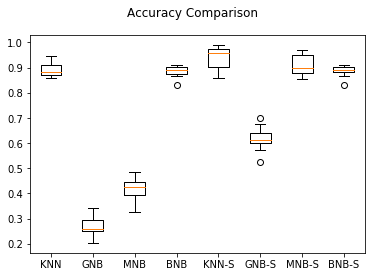

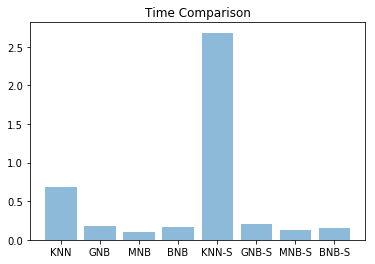

In [21]:
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import KFold

models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=k, p=2, weights='distance'), 0))
models.append(('GNB', GaussianNB(), 0))
models.append(('MNB', MultinomialNB(), 0))
models.append(('BNB', BernoulliNB(), 0))
# models with normalization on numerical columns
models.append(('KNN-S', KNeighborsClassifier(n_neighbors=k, p=2, weights='distance'), 1))
models.append(('GNB-S', GaussianNB(), 1))
models.append(('MNB-S', MultinomialNB(), 1))
models.append(('BNB-S', BernoulliNB(), 1))

results = []
names = []
run_times = []
scoring = 'accuracy'
for name, model, scaler in models:
    start = time.time()
    kfold = KFold(n_splits=10, random_state=7)
    if(scaler==1):
        scaler = MinMaxScaler()
        scaled_X  = scaler.fit_transform(X)
        cv_results = cross_val_score(model, scaled_X, y, cv=10, scoring=scoring)
    else:
        cv_results = cross_val_score(model, X, y, cv=10, scoring=scoring)
    stop= time.time()
    run_times.append(stop-start)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

print( "Run times: %s" % (run_times))
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


y_pos = np.arange(len(names))
plt.bar(y_pos, run_times, align='center', alpha=0.5)
plt.xticks(y_pos, names)
plt.title('Time Comparison')
plt.show()